# Homework 6: Active Control of Underwater Vehicles

## Introduction

This homework is designed to provide practical experience in modeling, simulation, and control of an underwater vehicle, specifically the REMUS AUV. The
homework is divided into three parts, each building upon the previous. By the
end of this assignment, you will have implemented a basic open loop control system,
simulated the vehicle’s response to different control inputs, and included feedback.

## Deliverables

You need to submit your code and the corresponding results including plots and explanations as a PDF. You can either write everything in the Jupyter Notebook or write an extra LaTeX file with plots and explanations and attach the code in the end. Code without explanation won't be graded.

## Part A: Simulation of the REMUS AUV with Open Loop Control (4 pts)

In this part, you will simulate the planar motion of the REMUS AUV using a
basic control strategy.

### Task A.1: Model the REMUS AUV
Develop a mathematical model for the planar motion of the REMUS AUV based on
the following parameters:
- Mass: $ m = 30 kg$
- Moment of inertia around the z-axis: $I_{zz} = 2.5 kg \cdot m^2$
- Surge drag coefficient: $ X_u = -50 kg/s$
- Sway drag coefficient: $ Y_v = -70 kg/s$
- Yaw drag coefficient: $ N_r = -30 kg \cdot m$

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import math

# NOTE: Add more import statements as you see fit

Define parameters of the REMUS AUV. Note, assume that all other parameters are zero.

In [148]:
# TODO: Define the parameters
params = {
    'm': 30.0,      # mass [kg]
    'Iz': 2.5,      # yaw inertia [kg m^2]
    'X_u': -50.0,   # surge drag coefficient [kg/s]
    'Y_v': -70.0,   # sway drag coefficient [kg/s]
    'N_r': -30.0    # yaw drag coefficient [kg·m]
}

Define the motion model

In [ ]:
def planar_motion_model(state, u, params):
      
    x, y, psi, u_b, v, r = state
    Xp, Yp, Np = u
    m, Iz = params['m'], params['Iz']

    x_dot = np.empty(6)

    # --- Kinematics ---
    x_dot[0] = u_b*np.cos(psi) - v*np.sin(psi)  # xdot
    x_dot[1] = u_b*np.sin(psi) + v*np.cos(psi)  # ydot
    x_dot[2] = r                               # psidot

    # --- Dynamics with linear drag + input ---
    X = Xp + params['X_u']*u_b
    Y = Yp + params['Y_v']*v
    N = Np + params['N_r']*r

    x_dot[3] = (X/m) + v*r     # udot
    x_dot[4] = (Y/m) - u_b*r   # vdot
    x_dot[5] = N/Iz            # rdot

    return x_dot


### Task A.2: Implement and simulate the model

Using the Runge-Kutta 4th order (RK4) method, implement and simulate the REMUS
AUV’s motion over a time period of $t = 20 s$ with step size $h = 0.1s$, an initial forward thrust of
$50 N$, and initial conditions:
- Surge velocity: $ u_0 = 1 m/s$
- Sway velocity: $ v_0 = 0 m/s $
- Yaw rate: $ r_0 = 0 rad/s $
- Initial positions: $ x_0 = y_0 = 0 m$

In [150]:
# --- Task A.2: Define initial conditions ---

# State vector: [x, y, psi, u, v, r]
x0 = np.array([0.0,   # x position [m]
               0.0,   # y position [m]
               0.0,   # heading psi [rad]
               1.0,   # surge velocity u [m/s]
               0.0,   # sway velocity v [m/s]
               0.0])  # yaw rate r [rad/s]

# Control input: [X', Y', N']
u_input = np.array([50.0,  # forward thrust [N]
                    0.0,   # no sway input
                    0.0])  # no yaw moment


Define Runge Kutta Integration Scheme

In [151]:
def rk4(f, x, u, t, h, params):
    """
    One step of 4th order Runge-Kutta integration.

    f      : dynamics function, f(t, x, u, params)
    x      : current state vector
    u      : control input vector
    t      : current time
    h      : step size
    params : parameter dictionary
    """
    k1 = f(x, u, params)
    k2 = f(x + 0.5*h*k1, u, params)
    k3 = f(x + 0.5*h*k2, u, params)
    k4 = f(x + h*k3, u, params)

    x_next = x + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return x_next


Simulate the system

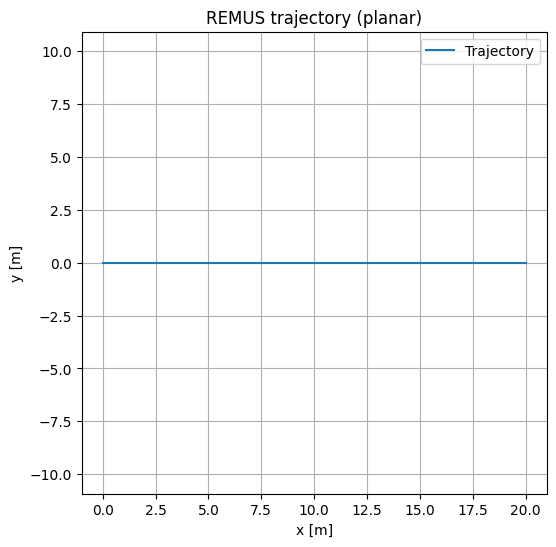

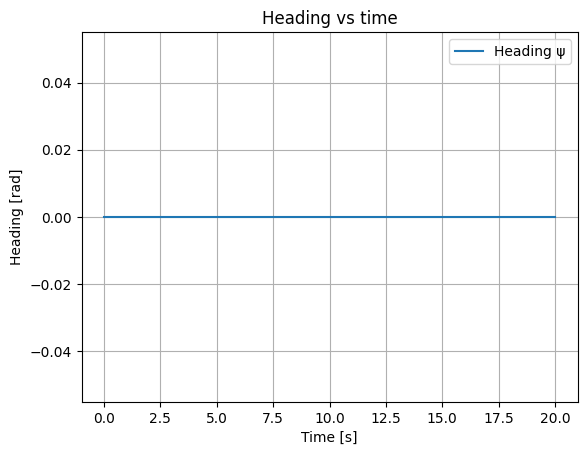

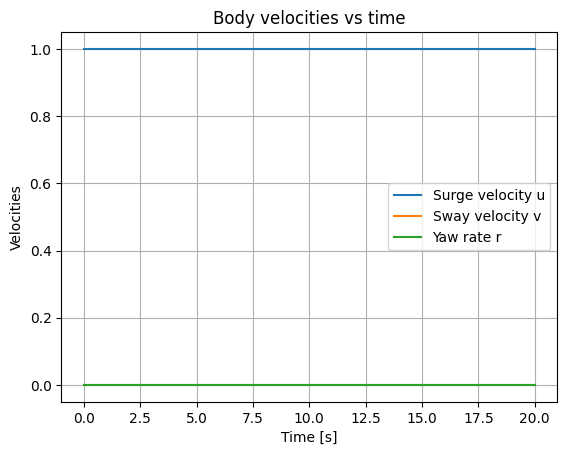

In [152]:
# --- Task A.2: Simulate the system ---

# Time settings
t0 = 0.0
tf = 20.0
h  = 0.1
N  = int((tf - t0)/h) + 1  # number of time steps

# Storage arrays
time = np.linspace(t0, tf, N)
states = np.zeros((N, 6))   # [x, y, psi, u, v, r]

# Initial condition
states[0, :] = x0

# Simulation loop
for k in range(N-1):
    states[k+1, :] = rk4(planar_motion_model, states[k, :], u_input, time[k], h, params)

# Extract results
x = states[:,0]
y = states[:,1]
psi = states[:,2]
u = states[:,3]
v = states[:,4]
r = states[:,5]

# Plot results
plt.figure(figsize=(6,6))
plt.plot(x, y, label="Trajectory")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("REMUS trajectory (planar)")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.show()

# --- Plot heading (psi) over time ---
plt.figure()
plt.plot(time, psi, label="Heading ψ")
plt.xlabel("Time [s]")
plt.ylabel("Heading [rad]")
plt.title("Heading vs time")
plt.grid(True)
plt.legend()
plt.show()

# --- Plot velocities u, v, r over time ---
plt.figure()
plt.plot(time, u, label="Surge velocity u")
plt.plot(time, v, label="Sway velocity v")
plt.plot(time, r, label="Yaw rate r")
plt.xlabel("Time [s]")
plt.ylabel("Velocities")
plt.title("Body velocities vs time")
plt.grid(True)
plt.legend()
plt.show()

### Results

The AUV is modeled in the horizontal plane with 3-DOF: Surge, Sway and Yaw. We have the state vector: 

$\textbf{x}=[x,y,\psi,u,v,r]^T$

The kinematics are:

$\dot{x}=u\cos{\psi}-v\sin{\psi}$

$\dot{y}=u\sin{\psi}+v\cos{\psi}$

$\dot{\psi}=r$

And the dynamics, assuming all other terms are zero, so only the linear damping terms are kept:

$\dot{u}=\frac{1}{m}(X_uu+X')+vr$

$\dot{v}=\frac{1}{m}(Y_vv+Y')-ur$

$\dot{r}=\frac{1}{I_z}(N_rr+N')$

We then set up the planar motion model using the kinematics and dynamics and simulate with the given mass, inertia and linear drag coefficients.The simulation was run for 20 seconds with a constant thrust input of 50 N, starting from the initial conditions 

$u_0 = 1$ m/s, $v_0 = 0$, $r_0 = 0$, and $x_0 = y_0 = 0$.

#### Plots
The trajectory plot in the $(x,y)$-plane shows that the vehicle moves in a 
straight line which is to be expected since the yaw rate $r$ remains zero without any rudder or yaw input.


The heading $\psi$ also remains at zero radians throughout the simulation, since the heading only changes if there is a yaw rate.

For the body velocitys we see that the surge velocity, $u$ rises with thrust, then settles at a steady value where thrust is balanced by the drag. The sway velocity and yaw rate are equal to zero since there are no sway forces or yaw moments applied for this model.



## Task B: PID Control and Rudder Actions (3 pts)

In this part, you will extend the simulation to include a PID controller and programmable rudder actions.

### Task B.1: PID Control

Extend your simulation from Part A by adding a PID controller to regulate the
surge velocity to maintain a desired speed of 1 m/s and to control the yaw rate
to maintain a straight course.

Define control parameters:

In [ ]:
# --- Task B.1: Define PID control parameters ---
"""Tested and tuned PID parameters for reasonable performance."""

# PID gains for surge velocity control (thrust) 
Kp_u = 80.0
Ki_u = 25.0
Kd_u = 2.0

# PID gains for yaw rate control (rudder) 
Kp_r = 100.0
Ki_r = 10.0
Kd_r = 2.0

# Initialize PID controller states
int_error_u = 0.0   # integral term for surge PID
prev_error_u = 0.0  # previous error for derivative term

int_error_r = 0.0   # integral term for yaw PID
prev_error_r = 0.0  # previous error for derivative term


Define references

In [154]:
# --- Task B.1: Define references ---

u_ref = 1.0   # desired surge velocity [m/s]
r_ref = 0.0   # desired yaw rate [rad/s] (straight course)


Define the control law. Try to control multiple states. What do you observe?

In [155]:
def compute_control_action(state, dt):
    global int_error_u, prev_error_u, int_error_r, prev_error_r
    
    # Unpack current state
    _, _, _, u, _, r = state

    # --- Errors ---
    e_u = u_ref - u     # surge velocity error
    e_r = r_ref - r     # yaw rate error

    # --- Integrators ---
    int_error_u += e_u * dt
    int_error_r += e_r * dt

    # --- Derivatives ---
    de_u = (e_u - prev_error_u) / dt
    de_r = (e_r - prev_error_r) / dt

    # --- PID laws ---
    Xp = Kp_u*e_u + Ki_u*int_error_u + Kd_u*de_u   # thrust
    Np = Kp_r*e_r + Ki_r*int_error_r + Kd_r*de_r   # yaw moment
    Yp = 0.0                                       # no sway control

    # Update memory
    prev_error_u = e_u
    prev_error_r = e_r

    # Return control vector
    return np.array([Xp, Yp, Np])




We used two independent PID controllers to controll the surge velocity and the yaw rate control. No control was applied for the sway since the REMUS AUV is a torpedo shaped AUV and is symmetric in the longitudinal axis and has no side thrusters which can produce a direct sway force.

Surge velocity control:

$X' = K_{p,u} e_u + K_{i,u} \int e_u dt + K_{d,u} \frac{de_u}{dt}$

where $e_u = u_{ref} - u$. This adjusts the thrust to maintain $u \approx 1$ m/s.

Yaw rate control:
$N' = K_{p,r} e_r + K_{i,r} \int e_r dt + K_{d,r} \frac{de_r}{dt}$

where $e_r = r_{ref} - r$. This adjusts the yaw moment to keep the vehicle on a straight course.



Simulate the system

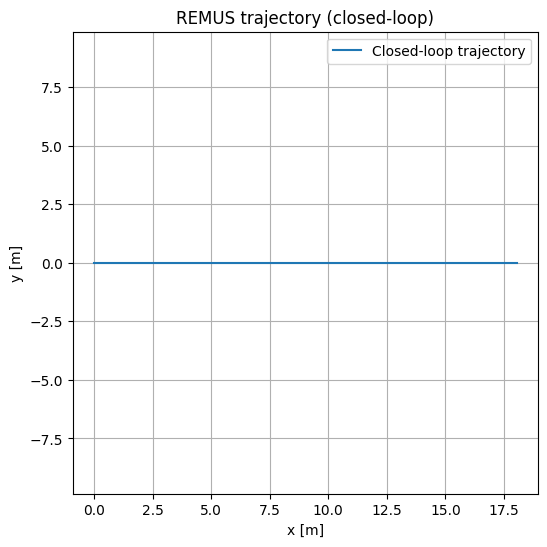

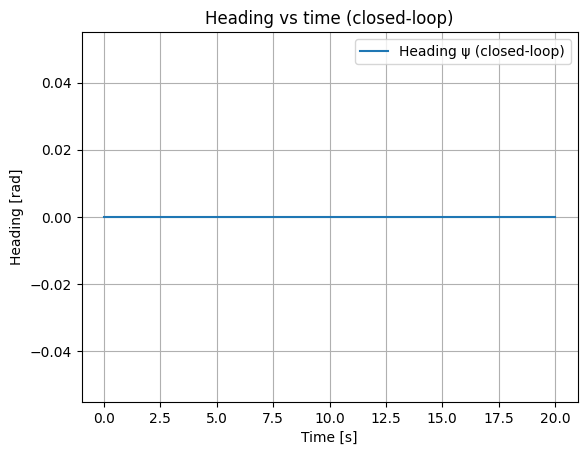

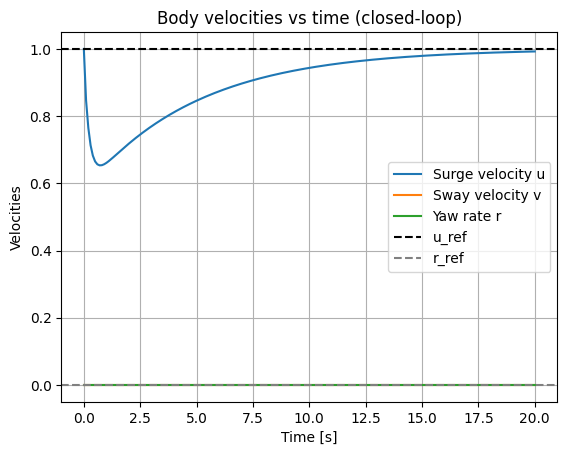

In [156]:
# --- Task B.1: Simulate the closed-loop system ---

# Time settings
t0 = 0.0
tf = 20.0
h  = 0.1
N  = int((tf - t0)/h) + 1

# Storage
time = np.linspace(t0, tf, N)
states_cl = np.zeros((N, 6))
states_cl[0, :] = x0

# Reset PID error states
int_error_u = 0.0
prev_error_u = 0.0
int_error_r = 0.0
prev_error_r = 0.0

# Simulation loop
for k in range(N-1):
    # Compute control input from PID
    u_input = compute_control_action(states_cl[k,:], h)
    
    # Integrate dynamics
    states_cl[k+1, :] = rk4(planar_motion_model, states_cl[k,:], u_input, time[k], h, params)

# Extract results
x_cl = states_cl[:,0]
y_cl = states_cl[:,1]
psi_cl = states_cl[:,2]
u_cl = states_cl[:,3]
v_cl = states_cl[:,4]
r_cl = states_cl[:,5]

# Plot closed-loop results
# --- Trajectory in XY-plane ---
plt.figure(figsize=(6,6))
plt.plot(x_cl, y_cl, label="Closed-loop trajectory")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("REMUS trajectory (closed-loop)")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.show()

# --- Heading over time ---
plt.figure()
plt.plot(time, psi_cl, label="Heading ψ (closed-loop)")
plt.xlabel("Time [s]")
plt.ylabel("Heading [rad]")
plt.title("Heading vs time (closed-loop)")
plt.grid(True)
plt.legend()
plt.show()

# --- Velocities u, v, r over time ---
plt.figure()
plt.plot(time, u_cl, label="Surge velocity u")
plt.plot(time, v_cl, label="Sway velocity v")
plt.plot(time, r_cl, label="Yaw rate r")
plt.axhline(u_ref, color='k', linestyle='--', label="u_ref")
plt.axhline(r_ref, color='gray', linestyle='--', label="r_ref")
plt.xlabel("Time [s]")
plt.ylabel("Velocities")
plt.title("Body velocities vs time (closed-loop)")
plt.grid(True)
plt.legend()
plt.show()

### Results
Using tuned PID gains ($K_p=80$, $K_i=25$, $K_d=2$), we see that the surge velocity $u$ dips but quickly recovers from the initial drag and the rises smoothly and converges at 1 m/s. Both the sway and yaw stay close to zero, showing a stable straight line motion.

Adjusting the control gains will affect how the controller reacts. For example a higher $K_p$ will make the vehicle reach the target speed or yaw faster, but if it's too large the system might oscillate or become unstable. For $K_i$ increasing the gain will remove the steady-state error, but if it's too large it will cause slow oscillations. The derivative gain $K_d$ damps oscillations and improves the stability, but if it's too high it will make the system less responsive. 

If we try with different initial conditions, for example if $u_0=0$ or $u_0=2$ we see that the controller will adjust the thrust untill the surge velocity settles at 1 m/s which is the desired speed. This also remains true if we change the heading or yaw rate from zero, the yaw controller will generate a corrective moment to cancel the rotation and bring back the vehicle to a straight course.

### Task B 2: Programmable Rudder Actions
Implement a rudder action that can be programmed to simulate different maneuvers. For example, implement a sinusoidal rudder input to simulate a zigzag
maneuver. Simulate the AUV’s response for a time period of 20 seconds.

Define a reference rudder input

In [ ]:
# --- Task B.2: Define reference rudder input ---

def rudder_input(t):
    """
    Programmable rudder input δ(t).
    used a sinusoidal maneuver with amplitude 10 deg and period 10 s.
    """
    delta_amp = np.deg2rad(10)   # 10 degrees in radians
    delta_period = 10.0          # seconds
    return delta_amp * np.sin(2*np.pi/delta_period * t)


Simulate with the reference input

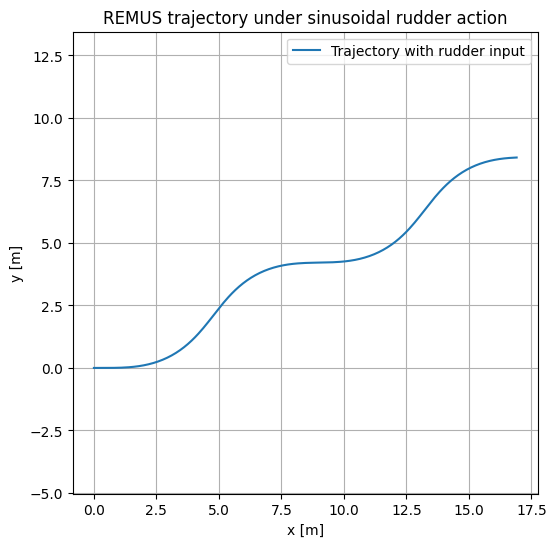

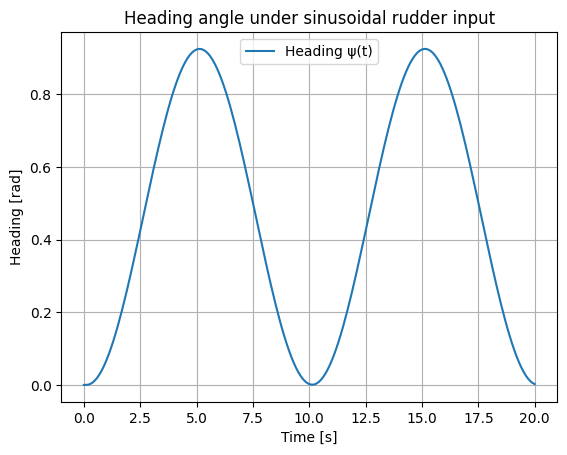

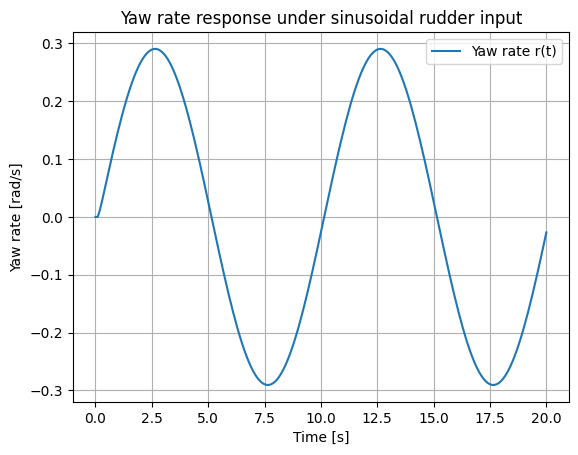

In [ ]:
# --- Task B.2: Simulate the system with programmable rudder input ---

# Example control derivatives
Y_delta = 0.0    # ignore sway contribution
N_delta = 50.0   # yaw moment per rad of rudder deflection

# Time setup
t0, tf, h = 0.0, 20.0, 0.1
N = int((tf - t0)/h) + 1
time = np.linspace(t0, tf, N)

# Storage
states_rudder = np.zeros((N,6))
states_rudder[0,:] = x0  # initial condition from Task A

# Loop
for k in range(N-1):
    delta = rudder_input(time[k])      
    u_input = np.array([
        50.0,             # constant thrust
        Y_delta*delta,    # sway force
        N_delta*delta     # yaw moment
    ])
    states_rudder[k+1,:] = rk4(planar_motion_model, states_rudder[k,:], u_input, time[k], h, params)

# Extract
x_rud, y_rud, psi_rud, u_rud, v_rud, r_rud = states_rudder.T

# Plot results with rudder input
# --- Trajectory ---
plt.figure(figsize=(6,6))
plt.plot(x_rud, y_rud, label="Trajectory with rudder input")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("REMUS trajectory under sinusoidal rudder action")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.show()

# --- Heading angle ---
plt.figure()
plt.plot(time, psi_rud, label="Heading ψ(t)")
plt.xlabel("Time [s]")
plt.ylabel("Heading [rad]")
plt.title("Heading angle under sinusoidal rudder input")
plt.grid(True)
plt.legend()
plt.show()

# --- Yaw rate ---
plt.figure()
plt.plot(time, r_rud, label="Yaw rate r(t)")
plt.xlabel("Time [s]")
plt.ylabel("Yaw rate [rad/s]")
plt.title("Yaw rate response under sinusoidal rudder input")
plt.grid(True)
plt.legend()
plt.show()

### Results
With a sinusoidal rudder input of amplitude 10° and period 20 s, the REMUS AUV 
makes a zig-zag trajectory.

#### Plots
The $(x,y)$-trajectory shows a side-to-side zig-zag pattern as the rudder input alternates sign. This is to be expected when the AUV is under sinusoidal rudder action


The heading angle $\psi$ oscillates smoothly between positive and negative values, closely following the sinusoidal rudder input. The maximum heading angle reaches about 0.9 rad ($\approx$ 50°). 


The yaw rate $r$ also oscillates sinusoidally, with positive and negative peaks corresponding to the rudder turning the vehicle left and right. The oscillations are centered around zero, which is expected for a symmetric sinusoidal input.



## Task C: Advanced Simulation and Control (2pts)

In this task, you expand the simulation and control scheme.

### Task C.1: Environmental Disturbances
Simulate the effect of environmental disturbances such as currents or waves on
the REMUS AUV. Incorporate these disturbances into your model and demonstrate
how your control strategy compensates for them.

In [159]:
# TODO: Implement disturbance, simulate, show and discuss the results

### Task C.2: Waypoint Following

Waypoint following is an essential task for AUVs. Implement a waypoint follower based on the previous tasks.

In [160]:
# TODO: Implement the waypoint follower, simulate, show and discuss the results